In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [73]:
dataset = pd.read_csv("Mall_Customers.csv")

In [74]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<BarContainer object of 200 artists>

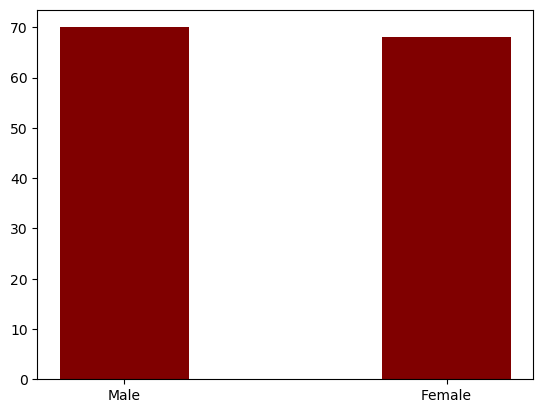

In [76]:
mpl.bar(dataset['Gender'], dataset['Age'], color ='maroon', width = 0.4)

<BarContainer object of 200 artists>

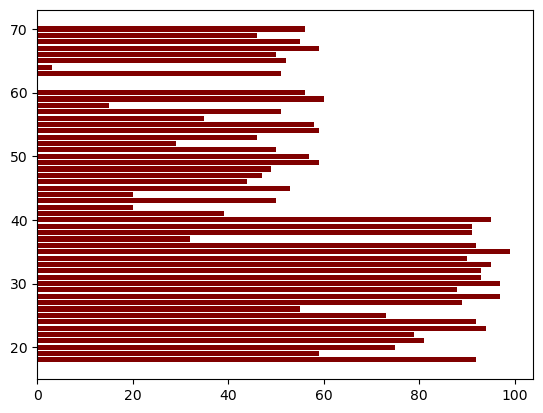

In [77]:
mpl.barh(dataset['Age'], dataset['Spending Score (1-100)'], color ='maroon')

<BarContainer object of 200 artists>

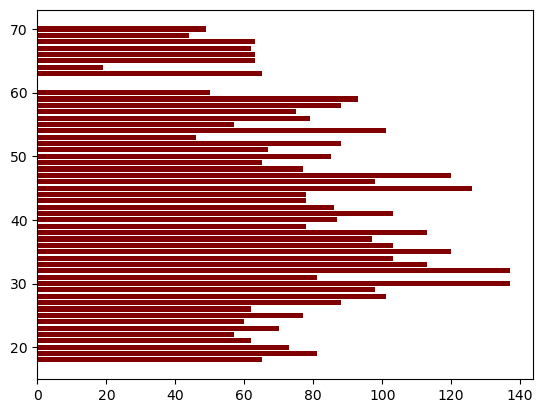

In [78]:
mpl.barh(dataset['Age'], dataset['Annual Income (k$)'], color ='maroon')

In [79]:
freq = dataset['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x7f086143b6d0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

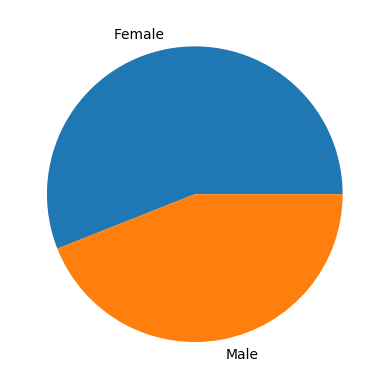

In [80]:
mpl.pie(freq.values , labels=freq.index)

In [81]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [83]:
import seaborn as sns

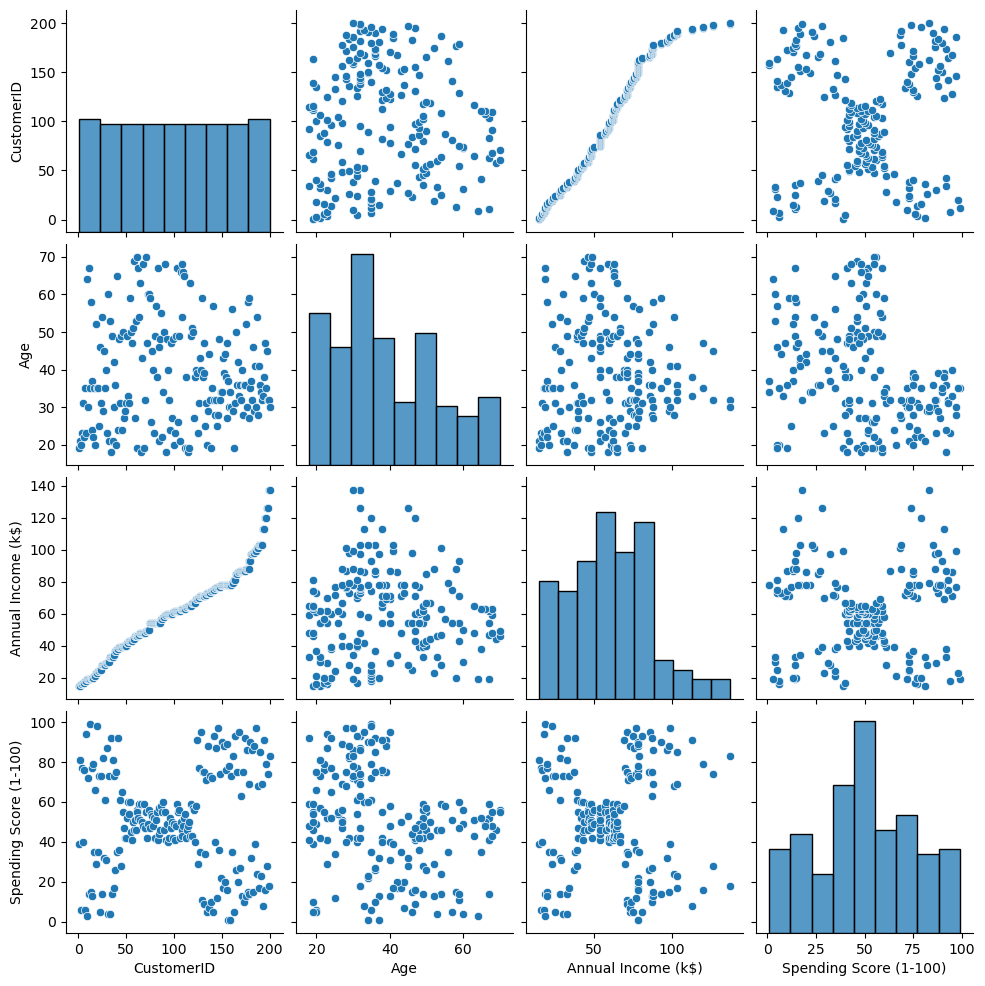

In [84]:
sns.pairplot(dataset)

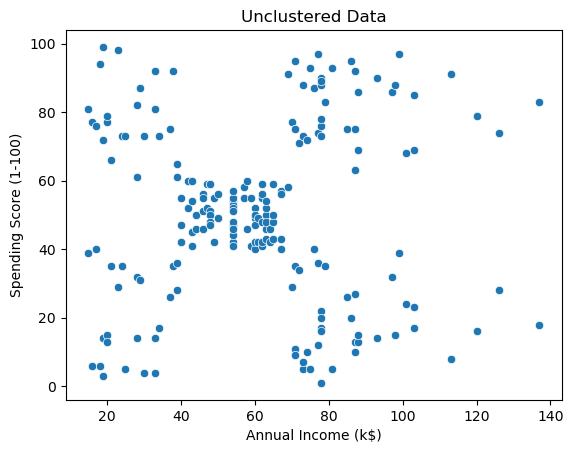

In [85]:
mpl.title("Unclustered Data")
sns.scatterplot(x = dataset['Annual Income (k$)'] , y = dataset['Spending Score (1-100)'])

In [86]:
from sklearn.cluster import KMeans

In [87]:
x = dataset.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [88]:
model = KMeans(n_clusters = 3)

In [89]:
model.fit(x)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [90]:
labels = model.predict(x)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [91]:
model.inertia_

106348.37306211119

In [92]:
from sklearn.metrics import silhouette_score

In [93]:
score = silhouette_score(x , labels)
score

0.46761358158775435

In [94]:
sse = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    sse.append(model.inertia_)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [95]:
sse

[181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25043.89004329005,
 21829.13563877983,
 20128.356320128118,
 17595.28888108518,
 16076.110997604548,
 14519.08374357203,
 12747.464279348103,
 11798.439994968801]

In [96]:
len(sse)

14

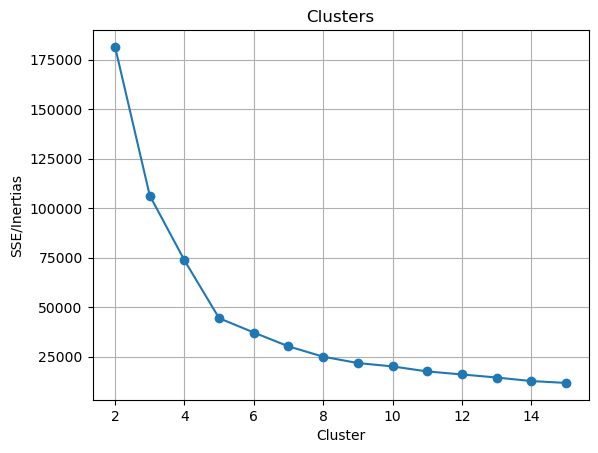

In [97]:
sse_array = np.array(sse)

mpl.plot(range(2, 16), sse_array, marker='o') 
mpl.title("Clusters")
mpl.xlabel("Cluster")
mpl.ylabel("SSE/Inertias")
mpl.grid()
mpl.show()

In [98]:
sil_score = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    labels = model.predict(x)
    score = silhouette_score(x , labels)
    sil_score.append(score)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [99]:
sil_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5281944387251989,
 0.4563394686110682,
 0.457462901394195,
 0.449795408266166,
 0.4489710248005492,
 0.4269031451249127,
 0.4160530554021723,
 0.42293878542041574,
 0.4212690598251587]

Text(0, 0.5, 'Silhoutte score')

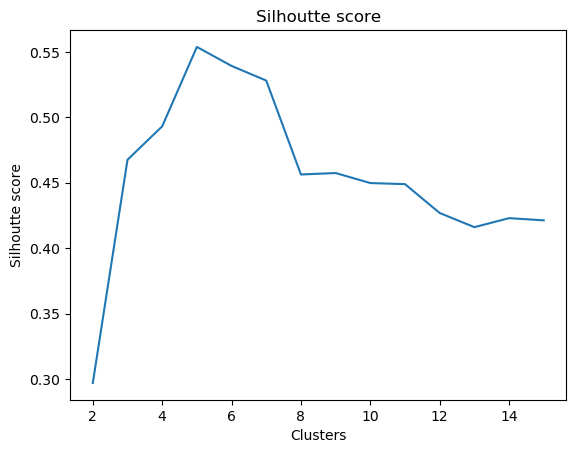

In [100]:
sil_array = np.array(sil_score)

mpl.title("Silhoutte score")
mpl.plot(range(2 , 16) , sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

Text(0, 0.5, 'Silhoutte score')

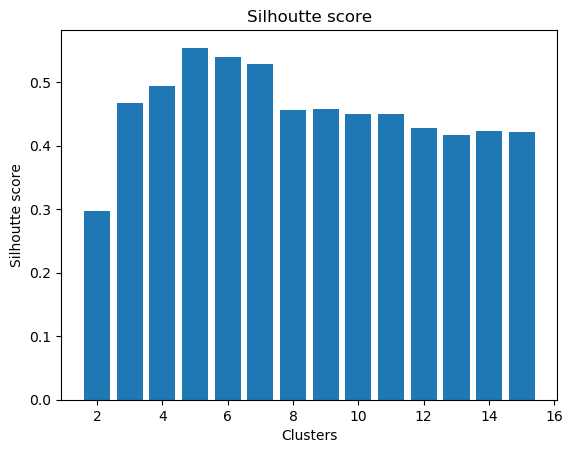

In [101]:
mpl.title("Silhoutte score")
mpl.bar(range(2 , 16) , sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

In [102]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(x , test_size = 0.2)

In [103]:
len(X_train)

160

In [104]:
len(X_test)

40

In [105]:
model = KMeans(n_clusters = 5)

In [106]:
model.fit(X_train)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [107]:
labels = model.predict(X_train)

In [108]:
model.inertia_

36829.26317166993

In [109]:
sil = silhouette_score(X_train , labels)
sil

0.5484023383383525

In [110]:
labels2 = model.predict(X_test)

In [111]:
sil = silhouette_score(X_test , labels2)
sil

0.5694822820410131

In [112]:
centers = model.cluster_centers_
centers

array([[24.46153846, 19.30769231],
       [55.02941176, 49.5       ],
       [87.29032258, 81.19354839],
       [27.05263158, 79.57894737],
       [88.03448276, 17.65517241]])

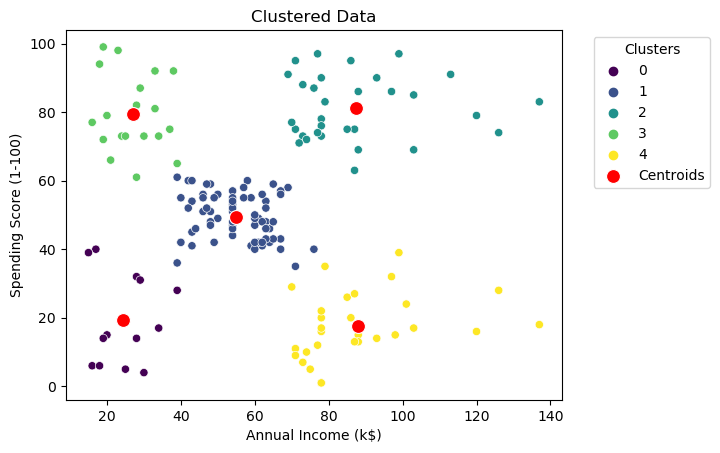

In [113]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , hue=labels, palette='viridis')
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red' , label='Centroids')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left') 
mpl.show()

In [114]:
input = np.array([15 , 39]).reshape(1 , -1)
predicted_data = model.predict(input)
predicted_data

/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [115]:
X = input[0,0]
Y = input[0,1]

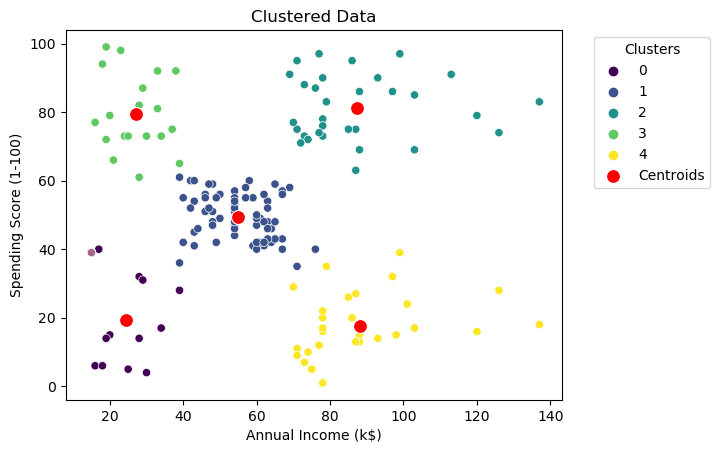

In [128]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , hue=labels, palette='viridis')
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red' , label='Centroids')
sns.scatterplot(x = X , y = Y , hue=labels, color='pink' , legend=False)
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left') 
mpl.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
model2 = AgglomerativeClustering(n_clusters = 5)

In [51]:
cluster = model2.fit(X_train)

In [52]:
labels = cluster.labels_
labels

array([0, 0, 0, 3, 0, 2, 4, 0, 3, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 3, 4, 1,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 3,
       1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 4, 0, 3, 4, 0, 0, 0, 1, 4, 1, 2, 3,
       2, 0, 0, 3, 2, 4, 0, 1, 2, 2, 0, 1, 4, 2, 0, 0, 2, 0, 0, 0, 3, 4,
       2, 3, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 4, 3, 0, 1, 0, 0, 0, 1, 1, 3, 4, 3,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 3, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0])

In [53]:
sil = silhouette_score(X_train , labels)
sil

0.49308345619125377

In [54]:
cluster2 = model2.fit(X_test)

In [55]:
labels2 = cluster.labels_
labels2

array([4, 3, 1, 4, 2, 1, 2, 0, 4, 4, 0, 0, 0, 2, 3, 0, 3, 0, 4, 4, 2, 4,
       4, 2, 2, 1, 2, 0, 0, 4, 4, 2, 1, 2, 2, 4, 4, 0, 0, 4])

In [56]:
sil2 = silhouette_score(X_test , labels2)
sil2

0.6139734736483426

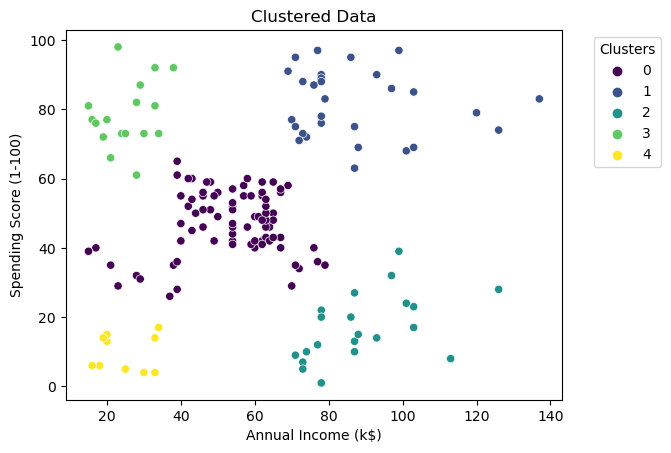

In [57]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , hue=labels, palette='viridis')
# sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left') 
mpl.show()

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

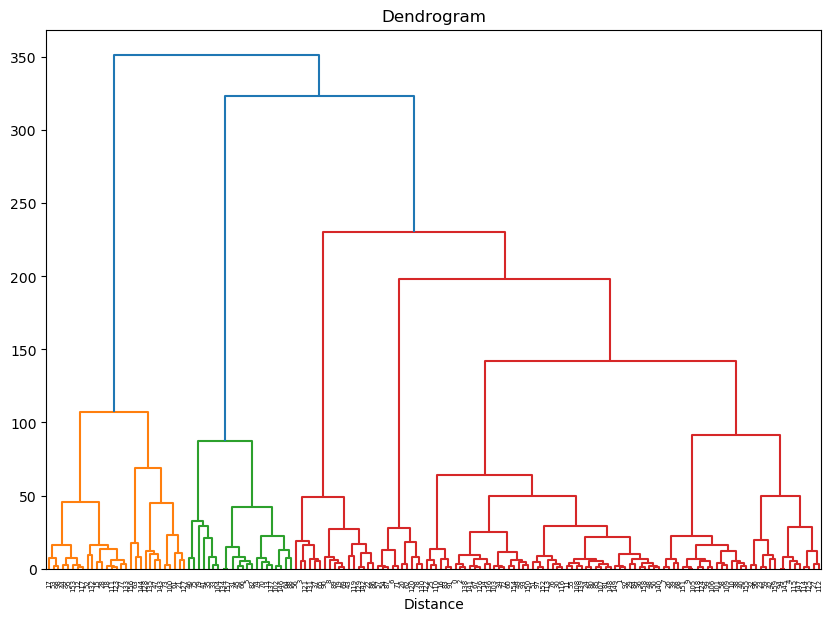

In [59]:
Z = linkage(X_train, method='ward') 

mpl.figure(figsize=(10, 7))
mpl.title("Dendrogram")

dendrogram(Z)
mpl.xlabel('Index')
mpl.xlabel('Distance')
mpl.show()

In [62]:
# input = np.array([15 , 39]).reshape(1 , -1)
# predicted_data = model2.fit_predict(input)
# predicted_data